# Introducción a la series de tiempo

El siguiente cuaderno tiene como objetivo introducir al lector al manejo básico de las series de tiempo en python.

Las librerías necesarias son:
  * pandas
  * matplotlib



In [3]:
import os
print(os.getcwd())

C:\Users\Angel Resendiz Plata\AppData\Local\Programs\Microsoft VS Code


In [4]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
url = r"C:\Users\Angel Resendiz Plata\OneDrive\Documentos\Programación\4Geeks\Guía programa\23.- Time Series Forecasting\Ejercicios\Datos\acea-water-prediction\Aquifer_Petrignano.csv"

In [6]:
df = pd.read_csv(url)

In [7]:
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [8]:
df2 = df[["Date","Depth_to_Groundwater_P24","Depth_to_Groundwater_P25"]]
df2

,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25
0,14/03/2006,-22.48,-22.18
1,15/03/2006,-22.38,-22.14
2,16/03/2006,-22.25,-22.04
3,17/03/2006,-22.38,-22.04
4,18/03/2006,-22.60,-22.04
...,...,...,...
5218,26/06/2020,-25.68,-25.07
5219,27/06/2020,-25.80,-25.11
5220,28/06/2020,-25.80,-25.19
5221,29/06/2020,-25.78,-25.18


In [9]:
df2.dtypes

Date                         object
Depth_to_Groundwater_P24    float64
Depth_to_Groundwater_P25    float64
dtype: object

# visualizar
elementos importantes como la tendencia y la estacionariad son importantes para modelar las series financieras, así que es importante poder visualizar.

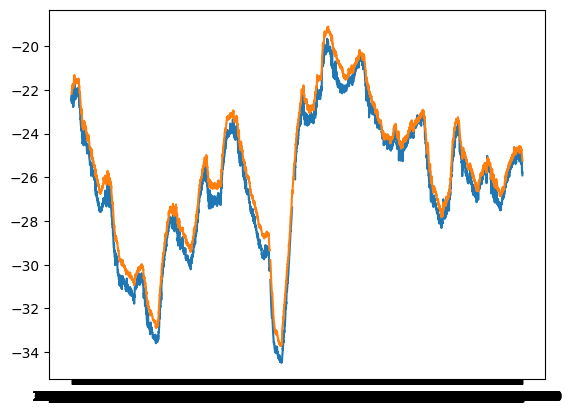

In [10]:
plt.plot(df2['Date'], df2['Depth_to_Groundwater_P24'])
plt.plot(df2['Date'], df2['Depth_to_Groundwater_P25'])

# Tunning the graph
we can uses:
  * plt.title()
  * plt.xlabel()
  * plt.ylabel()

Text(0.5, 0, 'time')

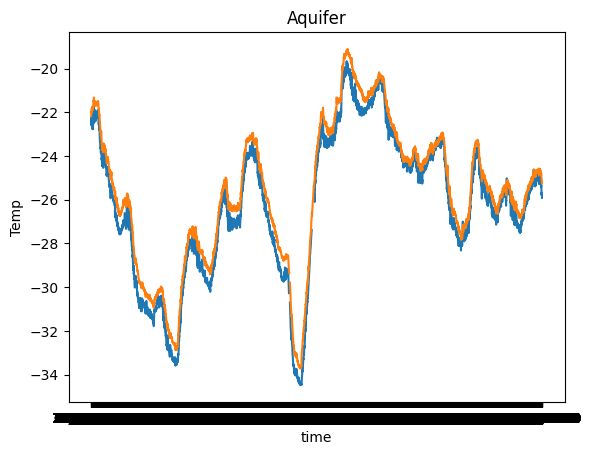

In [11]:
plt.plot(df2['Date'], df2['Depth_to_Groundwater_P24'])
plt.plot(df2['Date'], df2['Depth_to_Groundwater_P25'])
plt.title("Aquifer")
plt.ylabel("Temp")
plt.xlabel("time")

In [12]:
df['time'] = pd.to_datetime(df['Date'])


C:\Users\Angel Resendiz Plata\AppData\Local\Temp\ipykernel_19664\1204942754.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['time'] = pd.to_datetime(df['Date'])


In [14]:
df2 = df[["Date","time","Depth_to_Groundwater_P24","Depth_to_Groundwater_P25"]]
df2

,Date,time,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25
0,14/03/2006,2006-03-14,-22.48,-22.18
1,15/03/2006,2006-03-15,-22.38,-22.14
2,16/03/2006,2006-03-16,-22.25,-22.04
3,17/03/2006,2006-03-17,-22.38,-22.04
4,18/03/2006,2006-03-18,-22.60,-22.04
...,...,...,...,...
5218,26/06/2020,2020-06-26,-25.68,-25.07
5219,27/06/2020,2020-06-27,-25.80,-25.11
5220,28/06/2020,2020-06-28,-25.80,-25.19
5221,29/06/2020,2020-06-29,-25.78,-25.18


In [15]:
df2.dtypes

Date                                object
time                        datetime64[ns]
Depth_to_Groundwater_P24           float64
Depth_to_Groundwater_P25           float64
dtype: object

Pasar de string to datetime nos permite realizar operaciones sobre las fechas, como extarér el día, sumar etc..


In [18]:
print(df2['time'].min())
print(df2['time'].max()) # fecha más reciente en la base

2006-03-14 00:00:00
2020-06-30 00:00:00


In [19]:
df2['time'].max() - df2['time'].min() #timestamp, #timedelta

Timedelta('5222 days 00:00:00')

In [21]:
# Extaer información relevante para analizar, por ejempo los días, los meses, etc..
df2['day'] = df2['time'].dt.day

C:\Users\Angel Resendiz Plata\AppData\Local\Temp\ipykernel_19664\1476951041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['day'] = df2['time'].dt.day


In [22]:
df2.tail()

,Date,time,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,day
5218,26/06/2020,2020-06-26,-25.68,-25.07,26
5219,27/06/2020,2020-06-27,-25.80,-25.11,27
5220,28/06/2020,2020-06-28,-25.80,-25.19,28
5221,29/06/2020,2020-06-29,-25.78,-25.18,29
5222,30/06/2020,2020-06-30,-25.91,-25.25,30


In [23]:
df2['day_name'] = df2['time'].dt.day_name()
# prueba con month, year

C:\Users\Angel Resendiz Plata\AppData\Local\Temp\ipykernel_19664\2310682454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['day_name'] = df2['time'].dt.day_name()


In [24]:
df2['day_name']

0         Tuesday
1       Wednesday
2        Thursday
3          Friday
4        Saturday
          ...    
5218       Friday
5219     Saturday
5220       Sunday
5221       Monday
5222      Tuesday
Name: day_name, Length: 5223, dtype: object

In [25]:
# analizar las transacciones en un día particiular puede ser importante...
# podriamos realziar un ejercicio de comparación usando ANOVA?
df2.head()

,Date,time,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,day,day_name
0,14/03/2006,2006-03-14,-22.48,-22.18,14,Tuesday
1,15/03/2006,2006-03-15,-22.38,-22.14,15,Wednesday
2,16/03/2006,2006-03-16,-22.25,-22.04,16,Thursday
3,17/03/2006,2006-03-17,-22.38,-22.04,17,Friday
4,18/03/2006,2006-03-18,-22.60,-22.04,18,Saturday


In [28]:
# promedio de cierre por día
df2.groupby([df2["time"].dt.day_name()])['Depth_to_Groundwater_P25'].mean()

time
Friday      -25.703706
Monday      -25.668498
Saturday    -25.708151
Sunday      -25.683838
Thursday    -25.700350
Tuesday     -25.690391
Wednesday   -25.695453
Name: Depth_to_Groundwater_P25, dtype: float64

In [29]:
# precio de cierre por mes y día de la semana
df2.groupby([df2["time"].dt.month, df2["time"].dt.day_name()])['Depth_to_Groundwater_P25'].mean()
# interesante observe el septimo mes en cada día

time  time     
1     Friday      -26.128710
      Monday      -26.185410
      Saturday    -26.204590
      Sunday      -26.182787
      Thursday    -26.258889
                     ...    
12    Saturday    -26.660476
      Sunday      -26.612540
      Thursday    -26.499672
      Tuesday     -26.476129
      Wednesday   -26.488333
Name: Depth_to_Groundwater_P25, Length: 84, dtype: float64

In [30]:
df2.head()

,Date,time,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,day,day_name
0,14/03/2006,2006-03-14,-22.48,-22.18,14,Tuesday
1,15/03/2006,2006-03-15,-22.38,-22.14,15,Wednesday
2,16/03/2006,2006-03-16,-22.25,-22.04,16,Thursday
3,17/03/2006,2006-03-17,-22.38,-22.04,17,Friday
4,18/03/2006,2006-03-18,-22.60,-22.04,18,Saturday


Text(0, 0.5, 'mean price')

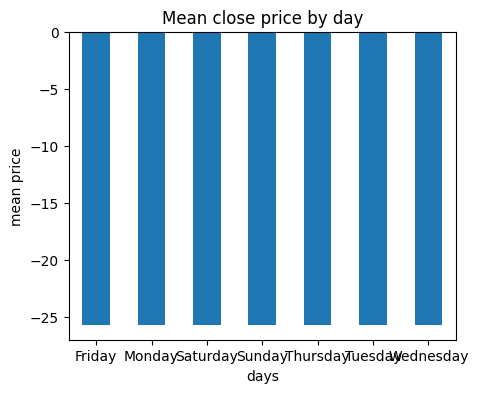

In [31]:
# gráficando el día
fig, axs = plt.subplots(figsize=(5,4))
df2.groupby(df2["time"].dt.day_name())["Depth_to_Groundwater_P25"].mean().plot(
    kind='bar', rot=0, ax=axs)
plt.title("Mean close price by day")
plt.xlabel("days")
plt.ylabel("mean price")

In [36]:
# datetime como index
df2.set_index(df['time'], inplace=True) #Una ventaja  el ajuste de las fechas

In [37]:
df2.head()

,Date,time,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,day,day_name
time,,,,,,
2006-03-14,14/03/2006,2006-03-14,-22.48,-22.18,14,Tuesday
2006-03-15,15/03/2006,2006-03-15,-22.38,-22.14,15,Wednesday
2006-03-16,16/03/2006,2006-03-16,-22.25,-22.04,16,Thursday
2006-03-17,17/03/2006,2006-03-17,-22.38,-22.04,17,Friday
2006-03-18,18/03/2006,2006-03-18,-22.60,-22.04,18,Saturday


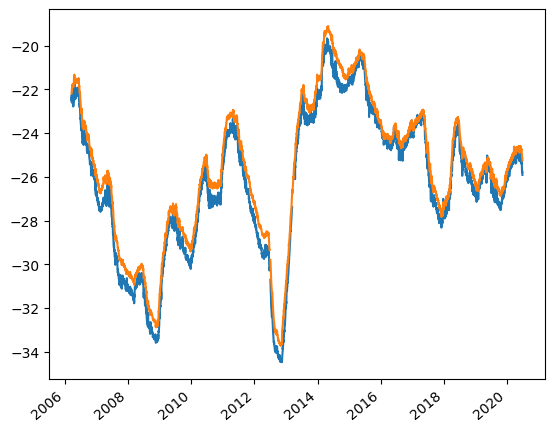

In [38]:
plt.plot(df2['Depth_to_Groundwater_P24'])
plt.plot(df2['Depth_to_Groundwater_P25'])
plt.xticks(rotation=40, ha='right'); #not show text

In [44]:
# determinando el índice podemos usar el slicing...
df2['2006-05-18':'2006-06-18']

,Date,time,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,day,day_name
time,,,,,,
2006-05-18,18/05/2006,2006-05-18,-22.23,-21.66,18,Thursday
2006-05-19,19/05/2006,2006-05-19,-22.15,-21.59,19,Friday
2006-05-20,20/05/2006,2006-05-20,-22.12,-21.56,20,Saturday
2006-05-21,21/05/2006,2006-05-21,-22.07,-21.55,21,Sunday
2006-05-22,22/05/2006,2006-05-22,-22.13,-21.55,22,Monday
2006-05-23,23/05/2006,2006-05-23,-22.19,-21.63,23,Tuesday
2006-05-24,24/05/2006,2006-05-24,-22.14,-21.61,24,Wednesday
2006-05-25,25/05/2006,2006-05-25,-22.15,-21.61,25,Thursday
2006-05-26,26/05/2006,2006-05-26,-22.25,-21.64,26,Friday


<Axes: xlabel='time'>

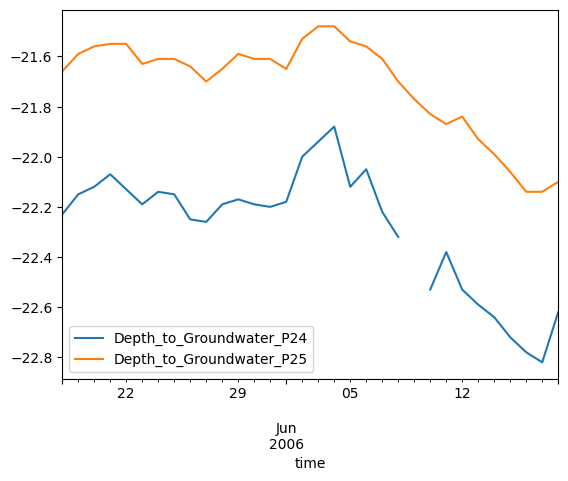

In [48]:
df2['2006-05-18':'2006-06-18'][['Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25']].plot()

In [49]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df2, period = 12)
decomposition

ValueError: could not convert string to float: '14/03/2006'